import library

In [30]:
#import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_column', 10)

Membaca dataset

In [12]:
#membaca dataset credit_scoring_dqlab dari file excel
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

print('Dataset credit scoring:')
print(dataset_credit_scoring)

Dataset credit scoring:
    kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0     AGR-000001                      295        YA                     48   
1     AGR-000011                      271        YA                     36   
2     AGR-000030                      159     TIDAK                     12   
3     AGR-000043                      210        YA                     12   
4     AGR-000049                      165     TIDAK                     36   
..           ...                      ...       ...                    ...   
895   AGR-010739                      112        YA                     48   
896   AGR-010744                      120        YA                     48   
897   AGR-010758                      166     TIDAK                     24   
898   AGR-010775                      196     TIDAK                     48   
899   AGR-010790                      204     TIDAK                     24   

     jumlah_tanggungan rata_rata_overdu

In [13]:
# Menampilkan informasi umum tentang dataset: jumlah baris, kolom dan tipe data
print('\nInformasi dataset:')
dataset_credit_scoring.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kode_kontrak             900 non-null    object
 1   pendapatan_setahun_juta  900 non-null    int64 
 2   kpr_aktif                900 non-null    object
 3   durasi_pinjaman_bulan    900 non-null    int64 
 4   jumlah_tanggungan        900 non-null    int64 
 5   rata_rata_overdue        900 non-null    object
 6   risk_rating              900 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 49.3+ KB


Mengubah Kolom kpr_aktif Menjadi Numerik

In [14]:
#mengubah data kpr_aktif menjadi tipe integer
dataset_credit_scoring['kpr_aktif'].replace(['YA', 'TIDAK'],[1, 0], inplace=True)

print('Dataset credit scoring:')
print(dataset_credit_scoring)

Dataset credit scoring:
    kode_kontrak  pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0     AGR-000001                      295          1                     48   
1     AGR-000011                      271          1                     36   
2     AGR-000030                      159          0                     12   
3     AGR-000043                      210          1                     12   
4     AGR-000049                      165          0                     36   
..           ...                      ...        ...                    ...   
895   AGR-010739                      112          1                     48   
896   AGR-010744                      120          1                     48   
897   AGR-010758                      166          0                     24   
898   AGR-010775                      196          0                     48   
899   AGR-010790                      204          0                     24   

     jumlah_tanggungan rata

/tmp/ipython-input-14-3655420385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_credit_scoring['kpr_aktif'].replace(['YA', 'TIDAK'],[1, 0], inplace=True)
/tmp/ipython-input-14-3655420385.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_credit_scoring['kpr_aktif'].replace(['YA

Mengubah Kolom rata_rata_overdue Menjadi Numerik

In [15]:
# Label Encoding rata_rata_overdue, untuk menghilangkan value string, sehingga bisa dibuat dalam bentuk numeric array, dan tidak error saat membuat modelnya
dataset_credit_scoring['rata_rata_overdue'].replace({'0 - 30 days':1, '31 - 45 days':2, '46 - 60 days':3 , '61 - 90 days':4, '> 90 days':5}, inplace=True)

print('Dataset credit scoring:')
print(dataset_credit_scoring)

Dataset credit scoring:
    kode_kontrak  pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0     AGR-000001                      295          1                     48   
1     AGR-000011                      271          1                     36   
2     AGR-000030                      159          0                     12   
3     AGR-000043                      210          1                     12   
4     AGR-000049                      165          0                     36   
..           ...                      ...        ...                    ...   
895   AGR-010739                      112          1                     48   
896   AGR-010744                      120          1                     48   
897   AGR-010758                      166          0                     24   
898   AGR-010775                      196          0                     48   
899   AGR-010790                      204          0                     24   

     jumlah_tanggungan  rat

/tmp/ipython-input-15-58999368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_credit_scoring['rata_rata_overdue'].replace({'0 - 30 days':1, '31 - 45 days':2, '46 - 60 days':3 , '61 - 90 days':4, '> 90 days':5}, inplace=True)
/tmp/ipython-input-15-58999368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

Feature Matrix X (Independent Variables)

In [16]:
#untuk X (independent variables), data yang dimasukkan semua persyaratan untuk membuat risk_rating (variabel dependen), tidak memerlukan kode_kontrak, sehingga kolom kode_kontrak,  risk_rating, dan rata_rata_overdue dibuang
X=dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue']).values
print('Ukuran matrix feature X:', X.shape)

Ukuran matrix feature X: (900, 4)


Target y (Dependent Variable)

In [17]:
#kolom Y (target/dependent variable) adalah target nilai yang harus dibuat sistem ketika membaca data X isinya adalah kolom risk_rating
y = dataset_credit_scoring['risk_rating'].values
print('Ukuran target y:', y.shape)

Ukuran target y: (900,)


Data Training dan Data Testing

In [18]:
#membagi data training dan data testing, dimana training 70% dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#menampilkan jumlah data train dan test
print('Ukuran X_train:', X_train.shape)
print('Ukuran X_test :', X_test.shape)
print('Ukuran y_train:', y_train.shape)
print('Ukuran y_test :', y_test.shape)

Ukuran X_train: (630, 4)
Ukuran X_test : (270, 4)
Ukuran y_train: (630,)
Ukuran y_test : (270,)


Membangun Random Forest Classifier

In [20]:
# Nilai Entropy menentukan bagaimana sebuah Decision Tree melakukan pemisahan data. Nilai Entropi berpengaruh ketika decision tree menentukan batasan/boundaries - nya. random_state digunakan untuk menentukan jumlah bootstrapping sample yang akan dilakukan. Nilai random state yang banyak digunakan adalah 0 dan 42.
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
model = rfc.fit(X_train, y_train)
print(model)

RandomForestClassifier(criterion='entropy', random_state=42)


Menggunakan Feature Importance

In [21]:
#mendapatkan importance
importance = model.feature_importances_

#nama feature
feature_names = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue']).columns

#summarize feature importance
for f, fi in zip(feature_names, importance):
	print('Feature: %24s, Score: %.5f' % (f, fi))

Feature:  pendapatan_setahun_juta, Score: 0.22462
Feature:                kpr_aktif, Score: 0.37739
Feature:    durasi_pinjaman_bulan, Score: 0.09436
Feature:        jumlah_tanggungan, Score: 0.30364


Visualisasi Feature Importance dengan Bar Chart

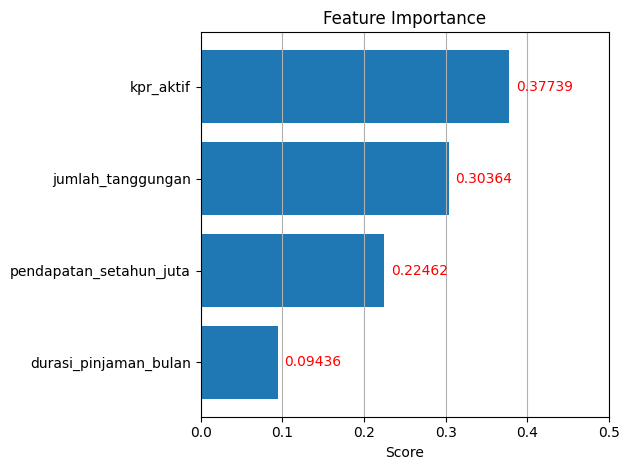

In [23]:
#Buat data frame agar lebih mudah dalam pengurutan
fi_df = pd.DataFrame({'Feature': feature_names, 'Score': importance}).sort_values('Score')

#mambuat visualisasi Feature Importance dengan Bar Chart
barh = plt.barh(fi_df['Feature'], fi_df['Score'])
plt.bar_label(barh, fmt='%.5f', padding=5, c='red')
plt.title('Feature Importance')
plt.xlabel('Score')
plt.xlim([0, 0.5])
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Menghilangkan Kolom durasi_pinjaman_bulan

In [24]:
#Feature matrix X1
X1 = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue', 'durasi_pinjaman_bulan']).values

#membagi data training dan data testing, dimana training 70% dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

#menampilkan jumlah data train dan test
print('Ukuran X_train:', X_train.shape)
print('Ukuran X_test :', X_test.shape)
print('Ukuran y_train:', y_train.shape)
print('Ukuran y_test :', y_test.shape)

Ukuran X_train: (630, 3)
Ukuran X_test : (270, 3)
Ukuran y_train: (630,)
Ukuran y_test : (270,)


Melakukan Pemodelan Ulang

In [26]:
#Melakukan pemodelan ulang dengan Random Forest
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
model = rfc.fit(X_train, y_train)

# Melihat hyperparameters yang tersedia
from pprint import pprint

print('Hyperparameters yang sedang digunakan:')
pprint(rfc.get_params())

Hyperparameters yang sedang digunakan:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Hyperparameter untuk RandomizedGridCV

In [31]:
#jumlah pohon pada random forest
n_estimators = list(np.linspace(200, 2000, num=100, dtype=np.int32))

#jumlah fitur yang dipertimbangkan untuk setiap pemisahan (split)
max_features = ['auto', 'sqrt']

#jumlah maksimum level pada setiap pohon
max_depth = list(np.linspace(10, 110, num=11, dtype=np.int32))
max_depth.append(None)

#jumlah minimum sample yang dibutuhkan untuk memisahkan node
min_samples_split = [2, 5, 10]

#jumlah minimum sample yang dibutuhkan untuk setiap leaf node
min_samples_leaf = [1, 2, 4]

#metode untuk memilih sampel untuk training setiap pohon
bootstrap = [True, False]

#membuat random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [np.int32(10),
               np.int32(20),
               np.int32(30),
               np.int32(40),
               np.int32(50),
               np.int32(60),
               np.int32(70),
               np.int32(80),
               np.int32(90),
               np.int32(100),
               np.int32(110),
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [np.int32(200),
                  np.int32(218),
                  np.int32(236),
                  np.int32(254),
                  np.int32(272),
                  np.int32(290),
                  np.int32(309),
                  np.int32(327),
                  np.int32(345),
                  np.int32(363),
                  np.int32(381),
                  np.int32(400),
                  np.int32(418),
                  np.int32(436),
                  np.int32(454),
                  np.int32(472),

Random Forest dengan RandomizedGridCV

In [32]:
#Random Forest
rfc = RandomForestClassifier(criterion='entropy', random_state=42)

#Import RandomizedSearchCV
from sklearn.model_selection  import RandomizedSearchCV

#Menggunakan random grid untuk mencari hyperparameters terbaik
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=0)

#Fit the random search model
rf_random.fit(X_train, y_train)

#Tampilkan parameter terbaik
print('\nParameter terbaik:')
pprint(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=781; total time=   4.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=781; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=781; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa


Parameter terbaik:
{'bootstrap': False,
 'max_depth': np.int32(100),
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': np.int32(418)}


Base Model vs Best Model

In [33]:
#Fungsi untuk mengevaluasi model berdasarkan data testing
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: %.4f degrees.' % (np.mean(errors),))
    print('Accuracy = %.2f%%.' % (accuracy,))

#Base Model
base_model = rfc.fit(X_train, y_train)
print('Base Model:')
print('-----------')
evaluate(base_model, X_test, y_test)

#Best Model
best_model = rf_random.best_estimator_
print('\n\nBest Model:')
print('-----------')
evaluate(best_model, X_test, y_test)

Base Model:
-----------
Model Performance
Average Error: 0.2556 degrees.
Accuracy = 86.65%.


Best Model:
-----------
Model Performance
Average Error: 0.2148 degrees.
Accuracy = 88.23%.
